# Classification with Support Vector Machines (SVM), ring

Non-linear SVM are used to

The ring problem is not linearly separable.

Make non-linear transformation of data and apply LSVM.

Kernel: Radial Basis Function (RBF)

## Index
<nav>

* [Import modules](#import_modules)
* [Loading data](#loading_data)
* [Exploring data](#exploring_data)
* [Cross validation](#cross_validation)
* [Training (fit the model)](#training)
* [Test (evaluate the model)](#test)
* [References](#references)
</nav>

<a id="import_modules"></a>
## Import modules

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold

<a id="loading_data"></a>
## Loading data

In [3]:
# Load training data
filename1 = 'input\\A2-ring\\A2-ring-separable.txt'
#filename1 = 'input\\A2-ring\\A2-ring-merged.txt'
ring_separable_data = np.loadtxt(filename1, delimiter='\t', dtype={'names': ('x', 'y', 'C'), 'formats': ('f4', 'f4', 'i4')})

# Create a DataFrame
train_df = pd.DataFrame(ring_separable_data)
print(train_df)

# Load test data
filename2 = 'input\\A2-ring\\A2-ring-test.txt'
ring_test_data = np.loadtxt(filename2, delimiter='\t', dtype={'names': ('x', 'y', 'C'), 'formats': ('f4', 'f4', 'i4')})

# Create a DataFrame
test_df = pd.DataFrame(ring_test_data)
print(test_df)

             x         y  C
0    -0.137094  0.899654  0
1     0.542574 -0.492435  1
2    -0.658204  0.605110  0
3    -0.869820  0.519287  0
4     0.678610  0.346579  1
...        ...       ... ..
9995  0.419610 -0.482939  1
9996 -0.456348  0.910800  0
9997 -0.003036 -0.295153  1
9998  0.765332  0.798063  0
9999 -0.532259 -0.302748  1

[10000 rows x 3 columns]
             x         y  C
0     0.512196  0.112623  1
1     0.610173 -0.387091  1
2     0.927970  0.245895  0
3     0.159933  0.111516  0
4    -0.451556  0.877259  0
...        ...       ... ..
9995  0.958078 -0.422827  0
9996  0.544659 -0.590963  0
9997 -0.684583  0.916596  0
9998  0.906773  0.274620  0
9999 -0.544859  0.132948  1

[10000 rows x 3 columns]


<a id="exploring_data"></a>
## Exploring data

### Exploring Training Data

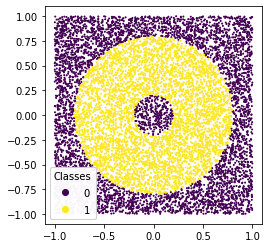

In [4]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
scatter = ax.scatter(train_df.iloc[:,0], train_df.iloc[:,1], c=train_df.iloc[:,2], s=1)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax.add_artist(legend1)
plt.show()

### Exploring Test Data

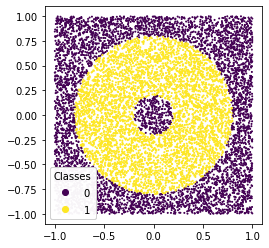

In [5]:
fig, ax2 = plt.subplots()
ax2.set_aspect('equal', 'box')
scatter2 = ax2.scatter(test_df.iloc[:,0], test_df.iloc[:,1], c=test_df.iloc[:,2], s=1)
# produce a legend with the unique colors from the scatter
legend2 = ax2.legend(*scatter2.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax2.add_artist(legend2)
plt.show()

<a id="cross_validation"></a>
## Cross validation

Using [k-fold cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold) in order to find good values for all the parameters of SVM: kernel, and parameters.

K-fold ---------------------------------------------------------------
Model accuracy: 0.9724


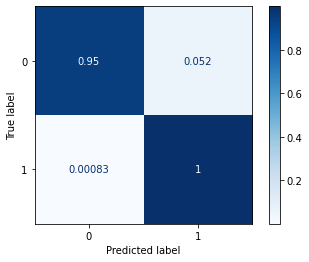

Confusion matrix:
 [[1232   68]
 [   1 1199]]
Percentage classification error obtained from validation set: 2.76%
K-fold ---------------------------------------------------------------
Model accuracy: 0.974


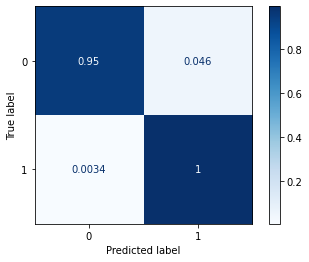

Confusion matrix:
 [[1254   61]
 [   4 1181]]
Percentage classification error obtained from validation set: 2.6%
K-fold ---------------------------------------------------------------
Model accuracy: 0.9688


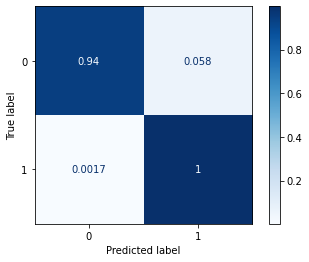

Confusion matrix:
 [[1241   76]
 [   2 1181]]
Percentage classification error obtained from validation set: 3.1199999999999997%
K-fold ---------------------------------------------------------------
Model accuracy: 0.9708


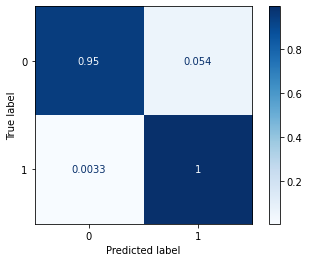

Confusion matrix:
 [[1202   69]
 [   4 1225]]
Percentage classification error obtained from validation set: 2.92%
Mean percentage classification error obtained from cross validation: 2.8499999999999996%


In [6]:
X_train = train_df[['x', 'y']].to_numpy()
y_train = train_df['C'].to_numpy()

cv_percentage_classification_errors = list()

# 4-fold cross-validation
kf = KFold(n_splits=4)
for train, validation in kf.split(X_train):
    print('K-fold ---------------------------------------------------------------')
    #print("%s %s" % (train, validation))
    #print('Training set')
    #print(X_train[train])
    #print(y_train[train])
    #print('Validation set')
    #print(X_train[validation])
    #print(y_train[validation])
    
    # Create the SVM estimator
    clf = SVC(kernel='rbf', random_state=0)
    
    # Train the model using the training set
    clf.fit(X_train[train], y_train[train])

    # Generate predictions
    y_pred = clf.predict(X_train[validation])
    
    # Evaluate by means of accuracy
    accuracy = accuracy_score(y_train[validation], y_pred)
    print(f'Model accuracy: {accuracy}')
    
    # Evaluate by means of a confusion matrix
    disp = ConfusionMatrixDisplay.from_predictions(y_train[validation], y_pred,
                                                   labels=clf.classes_,
                                                   display_labels=clf.classes_,
                                                   cmap=plt.cm.Blues,
                                                   normalize='true')
    plt.show()
    
    cm = confusion_matrix(y_train[validation], y_pred)
    print('Confusion matrix:\n', cm)

    # Calculate the percentage classification error obtained from validation test
    percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
    print(f'Percentage classification error obtained from validation set: {percentage_classification_error}%')
    
    cv_percentage_classification_errors.append(percentage_classification_error)
    
# Calculate the mean percentage classification error obtained from cross-validation
print(f'Mean percentage classification error obtained from cross validation: {np.mean(cv_percentage_classification_errors)}%')

<a id="training"></a>
## Training (fit the model)

In [7]:
# Create the SVM estimator
clf = SVC(kernel='rbf', random_state=0)
print('Names and current values for all parameters for the estimator: ', clf.get_params())

# Train the model using 'all' the training set
clf.fit(X_train, y_train)

Names and current values for all parameters for the estimator:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}


SVC(random_state=0)

<a id="test"></a>
## Test (evaluate the model)

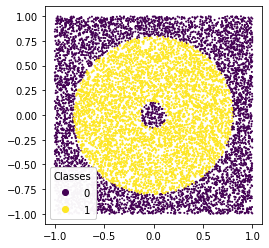

Model accuracy: 0.9764


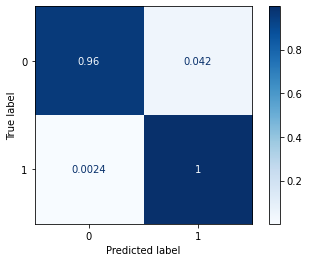

Confusion matrix:
 [[5108  225]
 [  11 4656]]
Percentage classification error obtained from test set: 2.36%


In [8]:
X_test = test_df[['x', 'y']].to_numpy()
y_test = test_df['C'].to_numpy()

#print(X_test)
#print(y_test)

# Generate predictions
y_pred = clf.predict(X_test)

# Visualize predictions
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
scatter = ax.scatter(X_test[:,[0]], X_test[:,[1]], c=y_pred, s=1)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax.add_artist(legend1)
plt.show()

# Evaluate by means of accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

# Evaluate by means of a confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                               labels=clf.classes_,
                                               display_labels=clf.classes_,
                                               cmap=plt.cm.Blues,
                                               normalize='true')
plt.show()

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# Calculate the percentage classification error obtained from test set
percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
print(f'Percentage classification error obtained from test set: {percentage_classification_error}%')

In [9]:
ring_svm_results = {'real_value': y_test,
                    'prediction': y_pred}
  
df = pd.DataFrame(ring_svm_results)

df.to_csv('ring_svm_results.csv')

<a id="references"></a>
## References:

Support Vector Machines:

- A Practical Guide to Support Vector Classification: https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf
- https://scikit-learn.org/stable/modules/svm.html#classification
- Support Vector Classification: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
- https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
- How do I select SVM kernels?: https://sebastianraschka.com/faq/docs/select_svm_kernels.html
- RBF SVMs with Python and Scikit-learn: an Example: https://www.machinecurve.com/index.php/2020/11/25/using-radial-basis-functions-for-svms-with-python-and-scikit-learn/#:~:text=the%20RBF%20kernel.-,RBF%20SVMs%20with%20Python%20and%20Scikit%2Dlearn%3A%20an%20Example,-We%20can%20easily
- RBF SVM parameters: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html